<h2> Models to Predict Patients Response to Different Medications</h2>

<b> By michael Kumakech</b>

In [54]:
#Import main libaries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

<b> Download the data set from IBM cloud</b>

In [27]:
#!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

In [55]:
df = pd.read_csv("drug200(1).csv", encoding = 'latin1')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [56]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [57]:
df.shape

(200, 6)

<b> Remove the independent features</b>

In [58]:
X =df[["Age","Sex","BP", "Cholesterol","Na_to_K"]].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

<B> The dependent features</b>

In [59]:
y =df["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

<b> Convert the Categorical values to numeric</b>

In [60]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])
le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])
le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3])
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

<H2>Set up the DT</h2>

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y,test_size=0.3, random_state=3)

<h2> Modeling</h2>

In [63]:
# Create Entropy
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [64]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

<h2> Prediction</h2>

In [65]:
predTree =drugTree.predict(X_trainset)

In [66]:
print(predTree [0:5])
print(y_trainset [0:5])

['drugY' 'drugY' 'drugY' 'drugA' 'drugY']
77    drugY
73    drugY
71    drugY
78    drugA
42    drugY
Name: Drug, dtype: object


<h2> Evaluation</h2>

In [67]:
from sklearn import metrics

In [18]:
#import matplotlib.pyplot as plt
#print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

<h2> Visulaization</h2>

In [19]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\pc\anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.7.22  |       h56e8100_0         146 KB  conda-forge
    certifi-2023.7.22          |     pyhd8ed1ab_0         150 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         297 KB

The following packages will be UPDATED:

  ca-certificates                      2022.9.24-h5b45459_0 --> 2023.7.22-h56e8100_0 None
  certifi                            2022.9.24-pyhd8ed1ab_0 --> 2023.7.22-pyhd8ed1ab_0 None




ca-certificates-2023 | 146 KB    |            |   0% 
ca-certificates-2023 | 146 KB    | #          |  11% 
ca-certificates-2023 | 146 KB    | ########## | 100% 
ca-certificates-2023 | 146 KB



==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c conda-forge conda




Solving environment: ...working... done

# All requested packages already installed.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c conda-forge conda





Retrieving notices: ...working... done


In [68]:
from six import StringIO

In [24]:
!pip install --upgrade scikit-learn==0.20.3

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\pc\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\pc\\AppData\\Local\\Temp\\pip-install-5ace9ukd\\scikit-learn_e01f8bc4f6d44d60bbb6010e95131af8\\setup.py'"'"'; __file__='"'"'C:\\Users\\pc\\AppData\\Local\\Temp\\pip-install-5ace9ukd\\scikit-learn_e01f8bc4f6d44d60bbb6010e95131af8\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\pc\AppData\Local\Temp\pip-wheel-phrrcty8'
       cwd: C:\Users\pc\AppData\Local\Temp\pip-install-5ace9ukd\scikit-learn_e01f8bc4f6d44d60bbb6010e95131af8\
  Complete output (680 lines):
  Partial import of sklearn during the build process.
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.


  Using cached scikit-learn-0.20.3.tar.gz (11.8 MB)
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
    Running setup.py install for scikit-learn: started
    Running setup.py install for scikit-learn: finished with status 'error'
  Rolling back uninstall of scikit-learn
  Moving to c:\users\pc\anaconda3\lib\site-packages\scikit_learn-1.0.2.dist-info\
   from C:\Users\pc\anaconda3\Lib\site-packages\~cikit_learn-1.0.2.dist-info
  Moving to c:\users\pc\anaconda3\lib\site-packages\sklearn\
   from C:\Users\pc\anaconda3\Lib\site-packages\~klearn


    libraries blis not found in ['C:\\Users\\pc\\anaconda3\\lib', 'C:\\', 'C:\\Users\\pc\\anaconda3\\libs']
    NOT AVAILABLE
  
  openblas_info:
    libraries openblas not found in ['C:\\Users\\pc\\anaconda3\\lib', 'C:\\', 'C:\\Users\\pc\\anaconda3\\libs']
  get_default_fcompiler: matching types: '['gnu', 'intelv', 'absoft', 'compaqv', 'intelev', 'gnu95', 'g95', 'intelvem', 'intelem', 'flang']'
  customize GnuFCompiler
  Could not locate executable g77
  Could not locate executable f77
  customize IntelVisualFCompiler
  Could not locate executable ifort
  Could not locate executable ifl
  customize AbsoftFCompiler
  Could not locate executable f90
  customize CompaqVisualFCompiler
  Could not locate executable DF
  customize IntelItaniumVisualFCompiler
  Could not locate executable efl
  customize Gnu95FCompiler
  Could not locate executable gfortran
  Could not locate executable f95
  customize G95FCompiler
  Could not locate executable g95
  customize IntelEM64VisualFCompiler
  cust

In [69]:
#from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

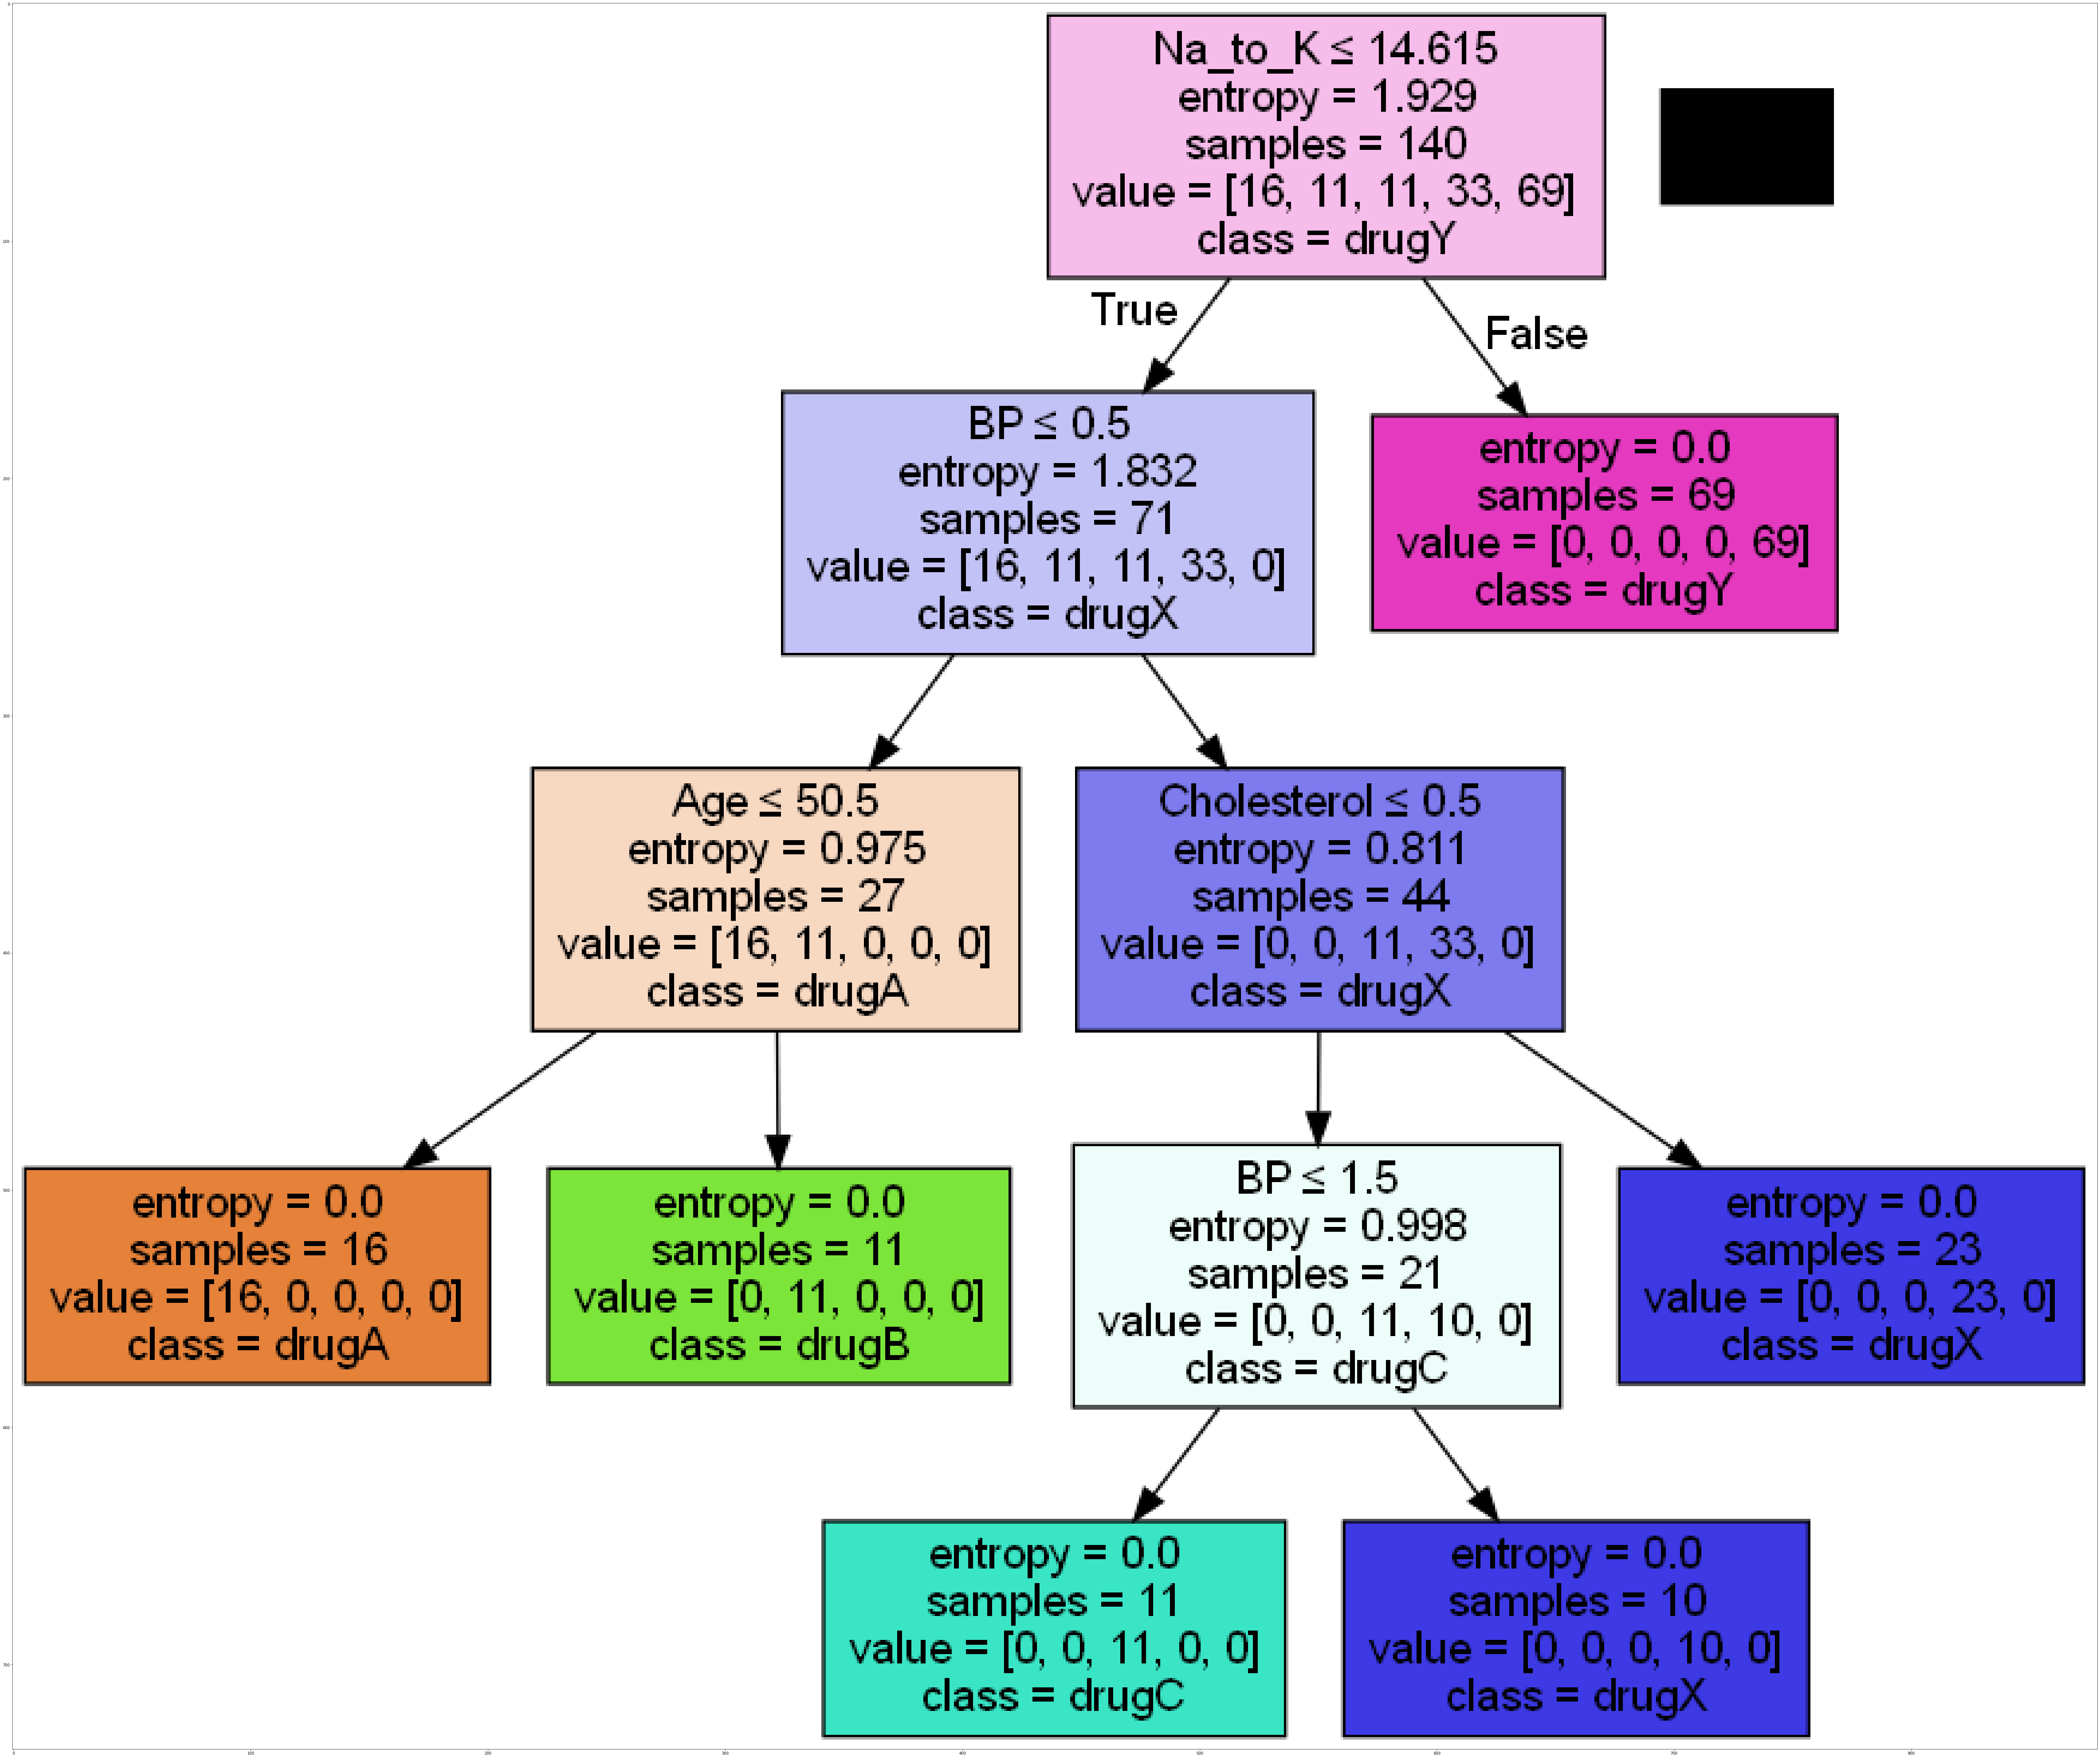

In [70]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:5]
targetNames = df["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames,out_file=dot_data, class_names= np.unique(y_trainset), filled=True,special_characters=True,rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

<h2> Evaluation of the model</h2>

<b> Import the libaries</b>

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
yhat_tree=drugTree.predict(X)
tree_jacc_test=metrics.jaccard_score(y, yhat_tree, average='micro')
tree_f1_test=metrics.f1_score(y, yhat_tree, average ='macro')
tree_cnf_matrix = confusion_matrix(y, yhat_tree)
print("Accuracy is ", tree_jacc_test, " F1 is" , tree_f1_test)
#print(classification_report(y, yhat_tree))
tree_cnf_matrix

Accuracy is  0.9900497512437811  F1 is 0.997037944946632


array([[23,  0,  0,  0,  0],
       [ 0, 16,  0,  0,  0],
       [ 0,  0, 16,  0,  0],
       [ 0,  0,  0, 53,  1],
       [ 0,  0,  0,  0, 91]], dtype=int64)

<H2> Conclusion</h2>

<b>The Model is 99% accurate and therefore we kindly adivice the hospital management to use the DT classifier to administer different types of drugs to patients</b>

<h2>2.  Random Forest Classification Algorithm </h2>

In [73]:
from sklearn.ensemble import RandomForestClassifier 

In [80]:
#split into a test/train set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print (X_train.shape, y_train.shape)

print (X_test.shape, y_test.shape)

(140, 5) (140,)
(60, 5) (60,)


In [81]:
#train model

clf = RandomForestClassifier(n_jobs=5, random_state=0)

 
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=5, random_state=0)

In [82]:
#create confusion matrix to gut check model

preds = clf.predict(X_test)

pd.crosstab(y_test, preds, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,drugA,drugB,drugC,drugX,drugY
Actual Result,,,,,
drugA,6,0,0,0,0
drugB,0,5,0,0,0
drugC,0,0,3,0,0
drugX,0,0,0,15,1
drugY,0,0,0,0,30


In [83]:
from sklearn import metrics

In [84]:
from sklearn.metrics import confusion_matrix

In [85]:
yhat_tree=clf.predict(X)
tree_jacc_test=metrics.jaccard_score(y, yhat_tree, average='micro')
tree_f1_test=metrics.f1_score(y, yhat_tree, average ='macro')
tree_precision_test=metrics.precision_score(y, yhat_tree, average ='macro')
tree_recall_test=metrics.recall_score(y, yhat_tree, average ='macro')
tree_accuracy_test=metrics.accuracy_score(y, yhat_tree)
tree_cnf_matrix = confusion_matrix(y, yhat_tree)
print("Accuracy is ", tree_jacc_test, " F1 is" , tree_f1_test,"Precision is", tree_precision_test, "Recall is", tree_recall_test,"Actual is", tree_accuracy_test)
#print(classification_report(y, yhat_tree))
tree_cnf_matrix

Accuracy is  0.9900497512437811  F1 is 0.997037944946632 Precision is 0.9978260869565216 Recall is 0.9962962962962962 Actual is 0.995


array([[23,  0,  0,  0,  0],
       [ 0, 16,  0,  0,  0],
       [ 0,  0, 16,  0,  0],
       [ 0,  0,  0, 53,  1],
       [ 0,  0,  0,  0, 91]], dtype=int64)

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [45]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [87]:
# Write codes to Compute confusion matrix
